In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import re

import warnings

warnings.filterwarnings('ignore')

In [11]:
train = pd.read_csv('./train.txt',delimiter=';')
val = pd.read_csv('./val.txt',delimiter=';')
test = pd.read_csv('./test.txt',delimiter=';')
train.columns=val.columns=test.columns = ['text','label']
train.head()

,text,label
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15999 non-null  object
 1   label   15999 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


c:\users\garg's pc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

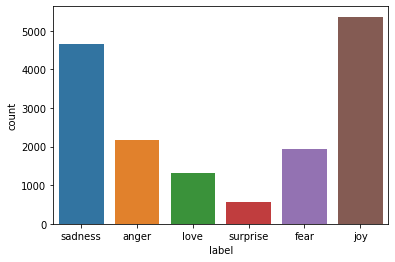

In [15]:
sns.countplot(train['label'])

c:\users\garg's pc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

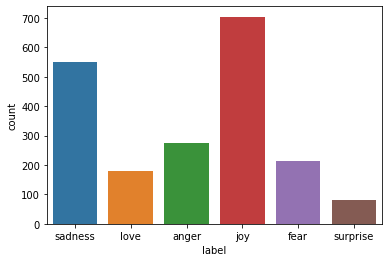

In [16]:
sns.countplot(val['label'])

c:\users\garg's pc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

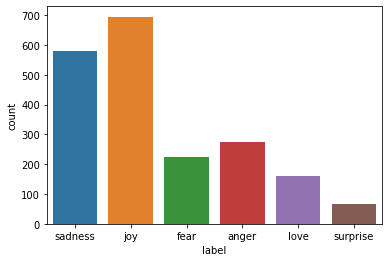

In [17]:
sns.countplot(test['label'])

In [28]:
train['label'].value_counts()

{'joy': 5362,
 'sadness': 4665,
 'anger': 2159,
 'fear': 1937,
 'love': 1304,
 'surprise': 572}

In [30]:
train['target'],test['target'],val['target'] = train['label'],test['label'],val['label']
train['target'].replace({'anger':0,'sadness':1,'fear':2,'joy':3,'love':4,'surprise':5},inplace=True)
test['target'].replace({'anger':0,'sadness':1,'fear':2,'joy':3,'love':4,'surprise':5},inplace=True)
val['target'].replace({'anger':0,'sadness':1,'fear':2,'joy':3,'love':4,'surprise':5},inplace=True)

# Sentiment Analysis using ML Models

In [60]:
#Preprocessing
stem = PorterStemmer()
def process_text(df):
    corpus = []
    for i in range(len(df)):
        stat = re.sub('[^a-zA-Z]',' ',df.iloc[i].text)
        stat = stat.lower()
        words = stat.split()
        
        wordss = [stem.stem(word) for word in words if word not in stopwords.words('english')] 
        stat = ' '.join(wordss)
        corpus.append(stat)
        if i%500==0:
            print('processed {}/{}'.format(i,len(df)))
    return corpus

In [ ]:
x = process_text(train)

In [ ]:
val_corpus = process_text(val)
test_corpus = process_text(test)

In [68]:
train['text'],val['text'],test['text'] = x,val_corpus,test_corpus

In [72]:
train.head(2)

,text,label,target
0,go feel hopeless damn hope around someon care ...,sadness,1
1,im grab minut post feel greedi wrong,anger,0


In [79]:
#merging all for ML modelling
df = pd.concat([train,val,test])
df.head(2)

,text,label,target
0,go feel hopeless damn hope around someon care ...,sadness,1
1,im grab minut post feel greedi wrong,anger,0


<AxesSubplot:xlabel='label', ylabel='count'>

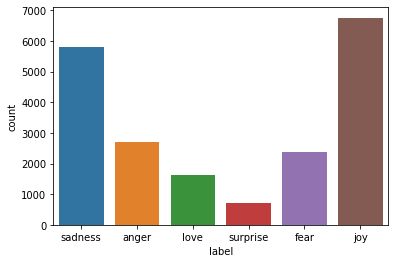

In [80]:
sns.countplot(df['label'])

In [91]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['text'])

In [95]:
X.shape

(19997, 10000)

In [96]:
trainX,testX,trainY,testY = train_test_split(X,df['target'],random_state=21,stratify=df['target'],test_size=0.25)

In [99]:
print('train shape: {}'.format(trainX.shape))
print('test shape: {}'.format(testX.shape))

train shape: (14997, 10000)
test shape: (5000, 10000)


In [116]:
# Training Model

model = RandomForestClassifier()
model.fit(trainX,trainY)

pred = model.predict(testX)
print(accuracy_score(testY,pred))
print(confusion_matrix(testY,pred))
print(classification_report(testY,pred))

0.8416
[[ 573   51   20   24    5    4]
 [  53 1275   42   54   15   10]
 [  29   29  483   22    5   25]
 [  33   62   27 1467   77   25]
 [  12    8    3  104  281    2]
 [   2    5   33   11    0  129]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       677
           1       0.89      0.88      0.89      1449
           2       0.79      0.81      0.80       593
           3       0.87      0.87      0.87      1691
           4       0.73      0.69      0.71       410
           5       0.66      0.72      0.69       180

    accuracy                           0.84      5000
   macro avg       0.79      0.80      0.80      5000
weighted avg       0.84      0.84      0.84      5000

